In [1]:
import matplotlib.pyplot as plt
def plot_weights(x, y, title, threshold, color_map):
    figure = plt.figure(figsize=(18, 4))
    plt.scatter(x, y, c = color_map, cmap="bwr")
    max_y = threshold if max(y) < threshold else max(y)
    plt.ylim([0, max_y])
    plt.title("Round {}".format(title))
    plt.colorbar(ticks=range(len(color_map)))

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


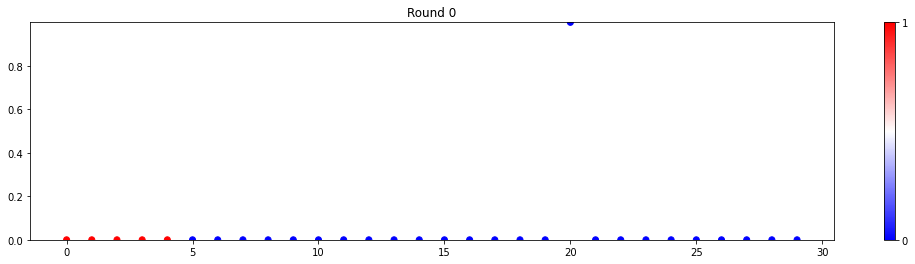

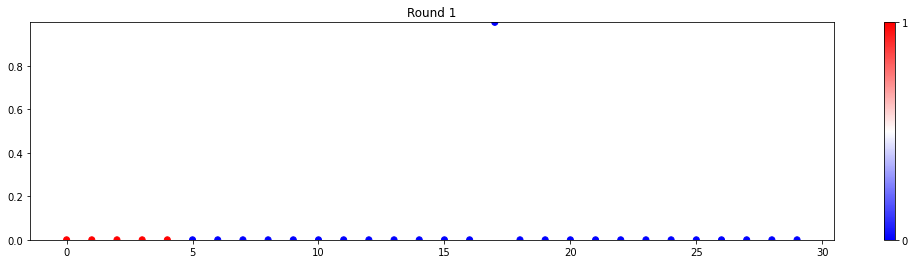

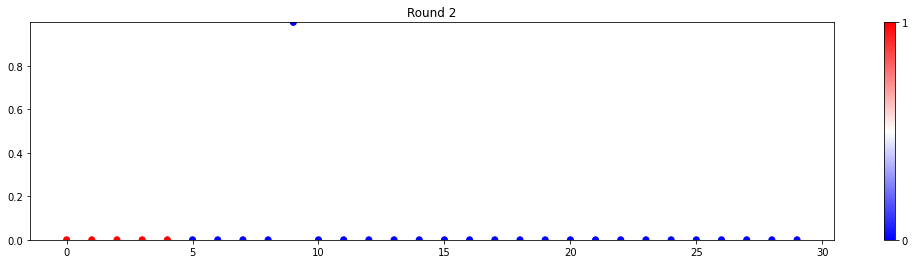

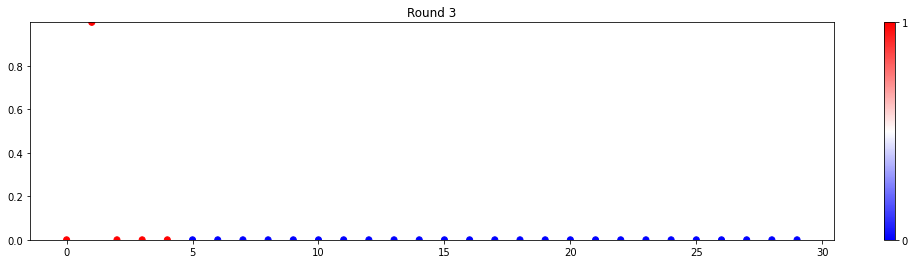

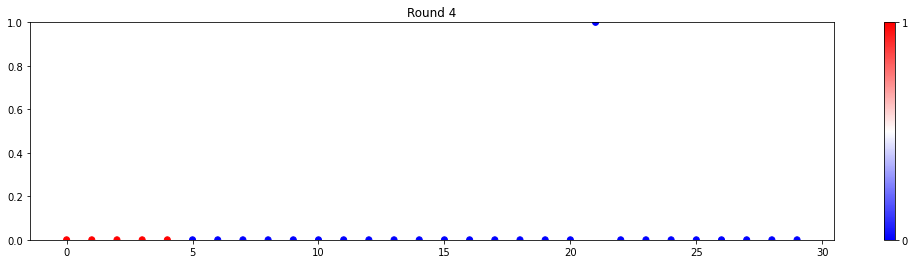

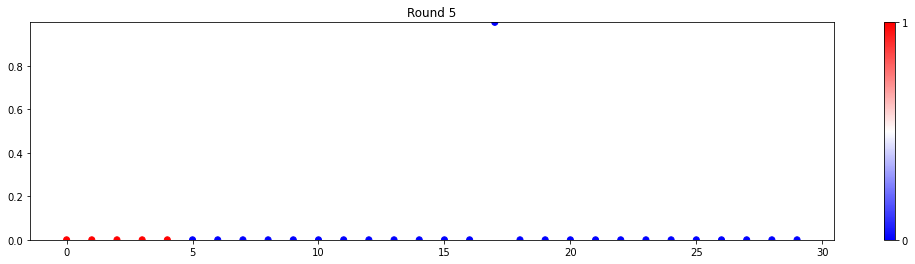

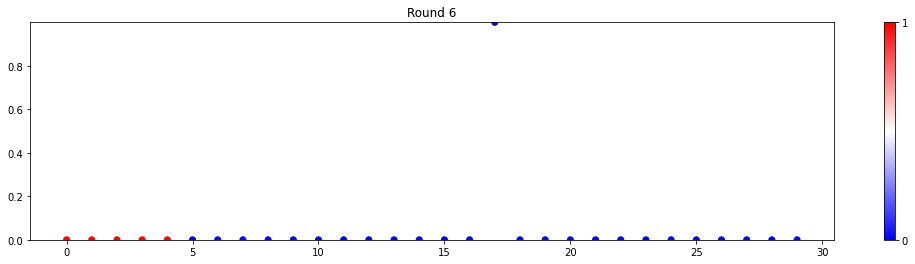

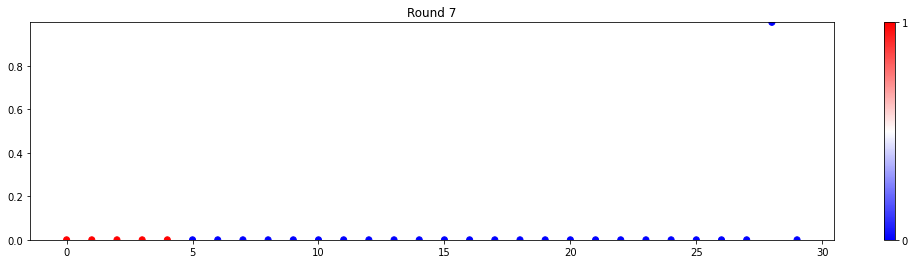

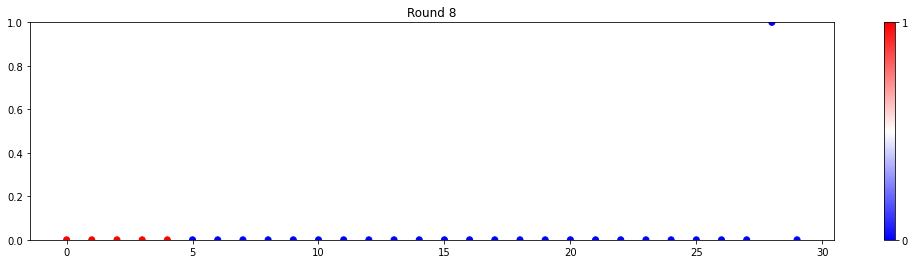

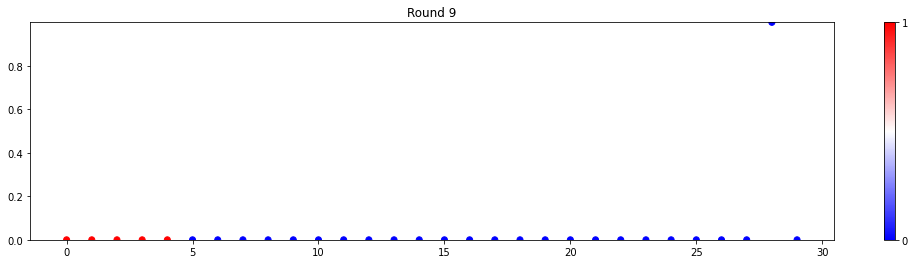

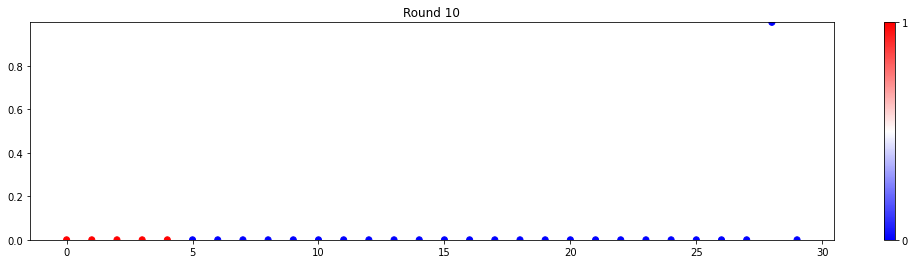

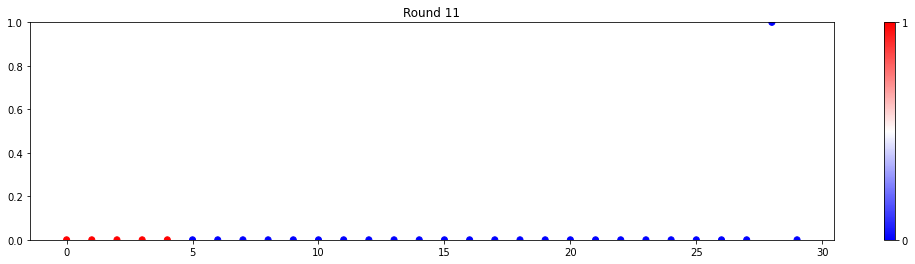

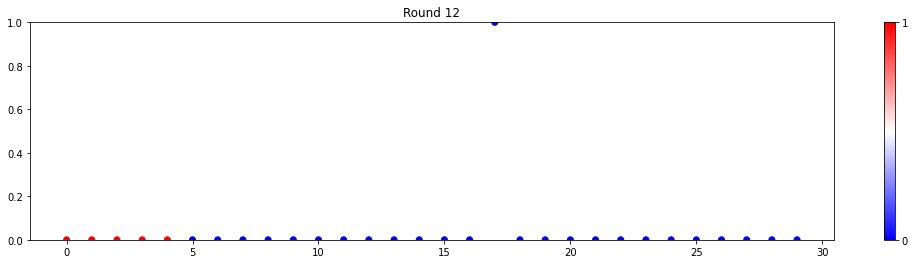

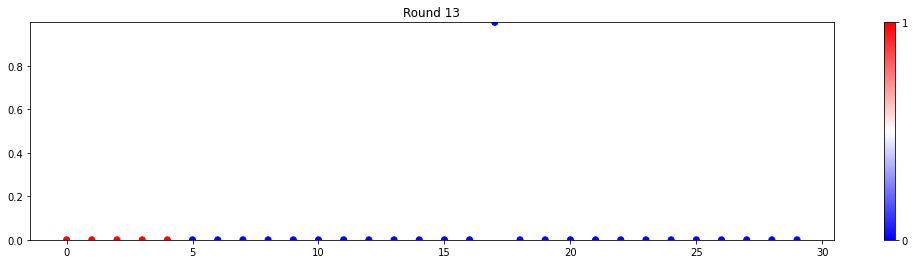

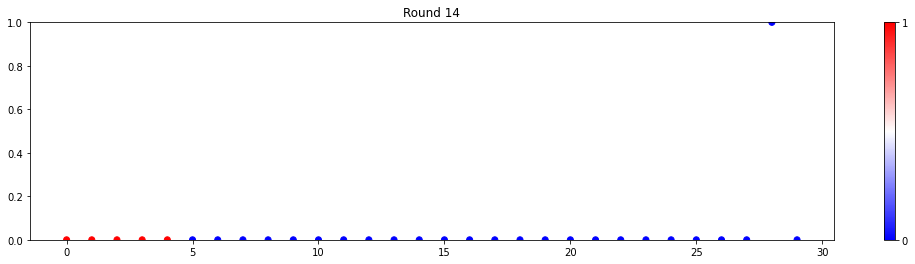

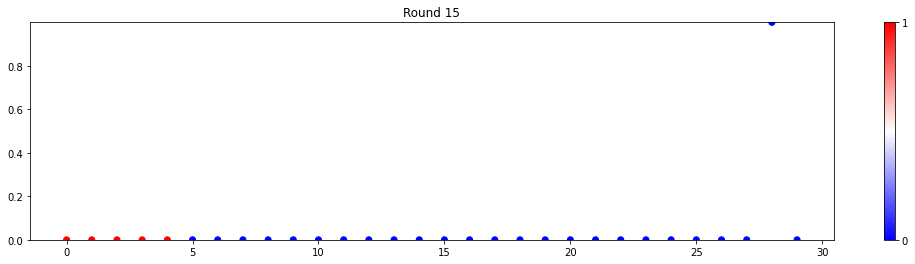

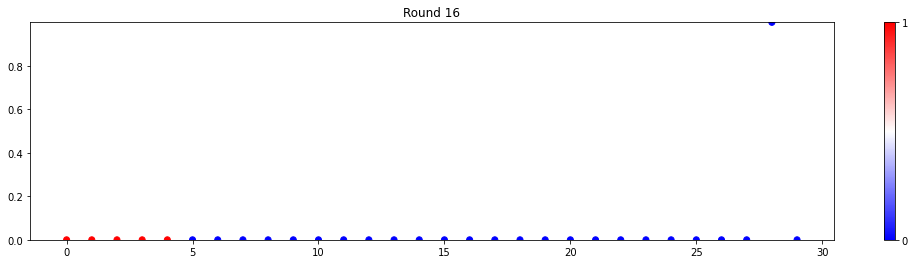

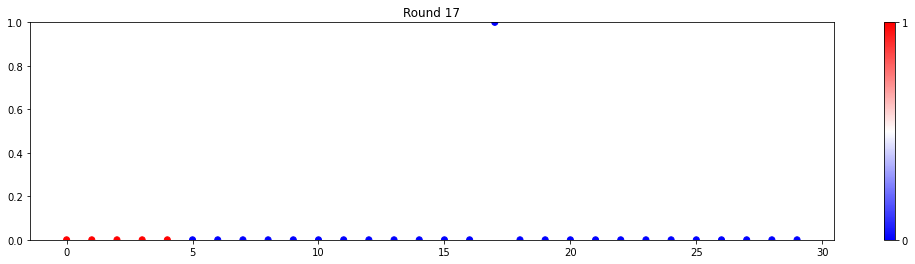

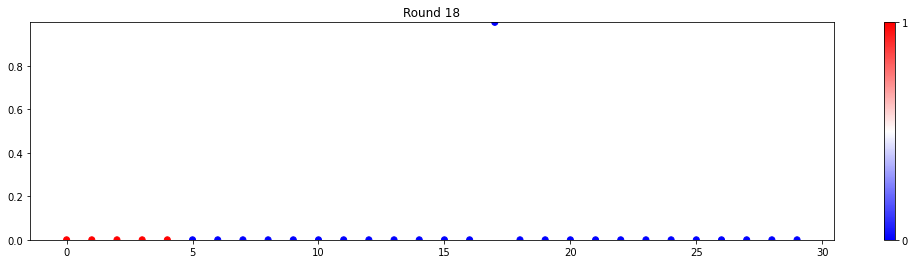

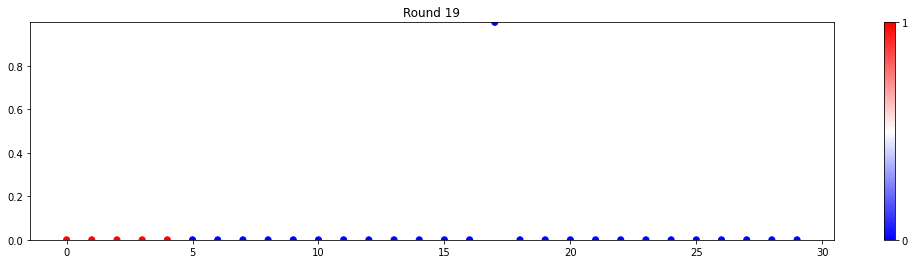

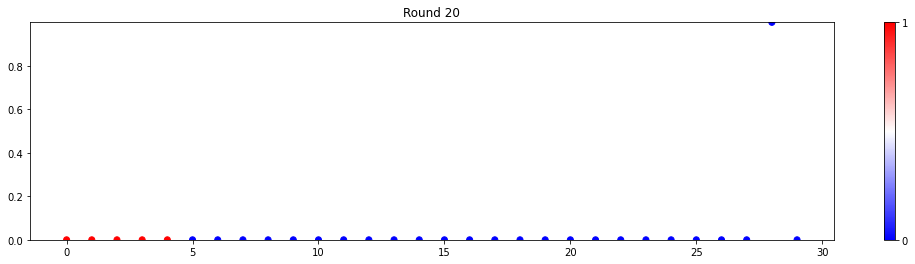

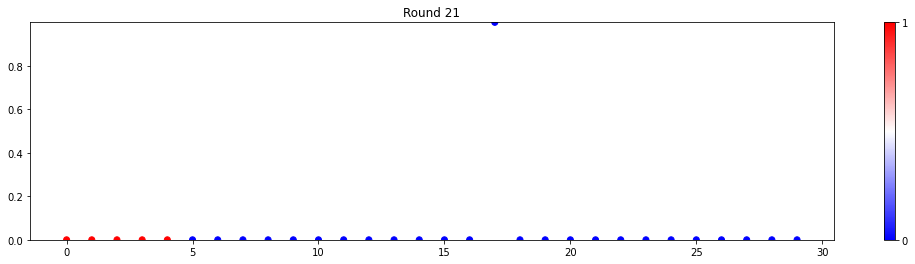

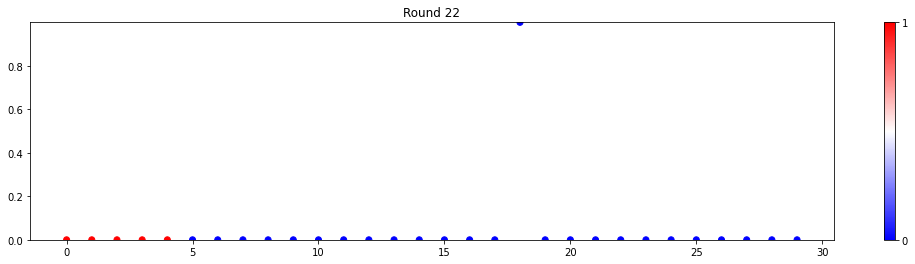

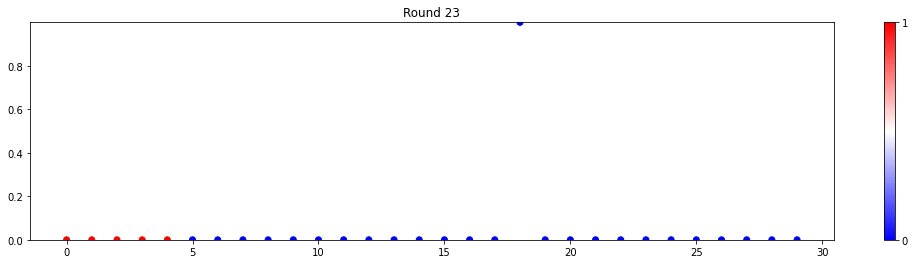

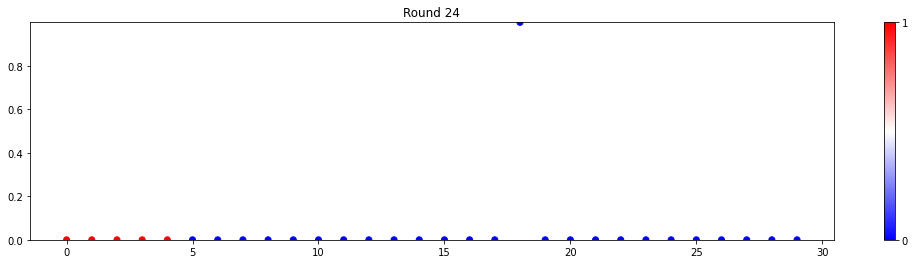

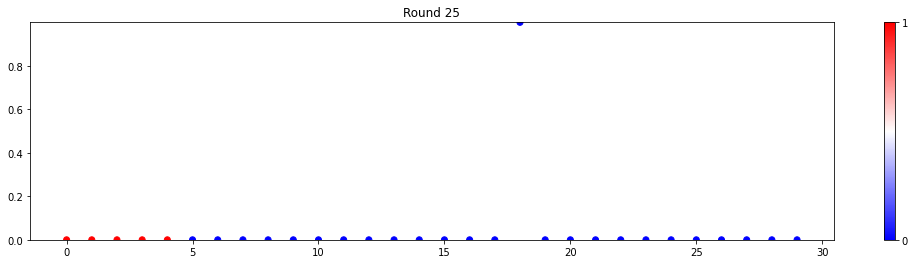

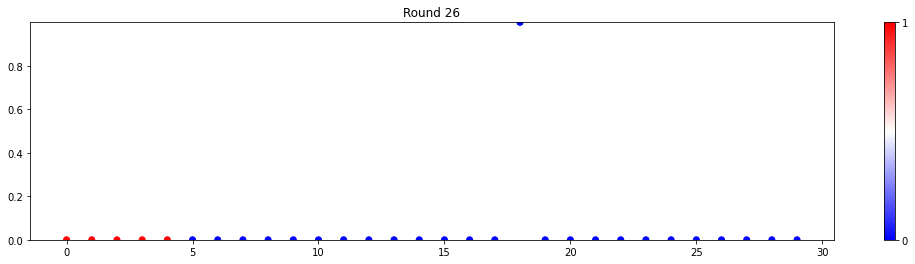

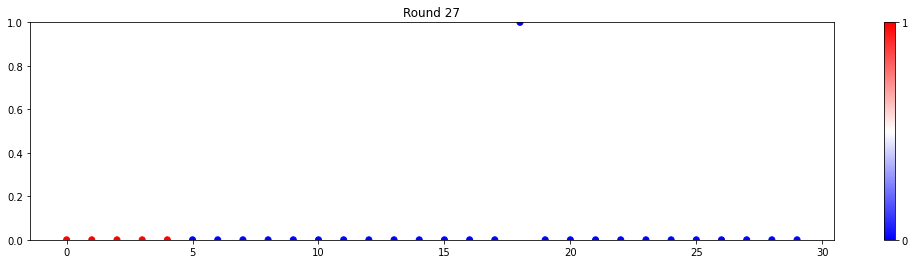

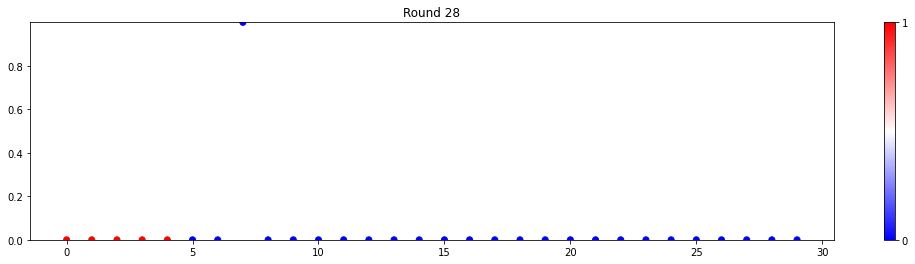

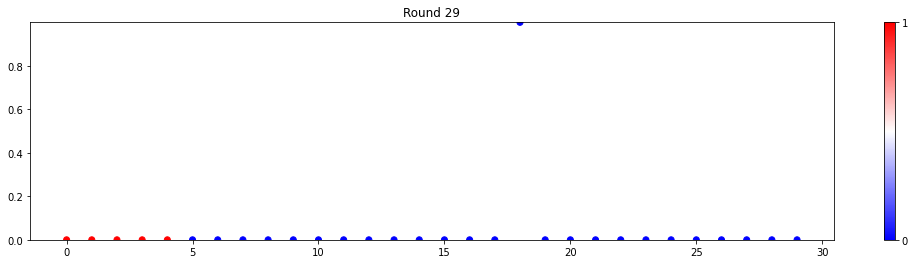

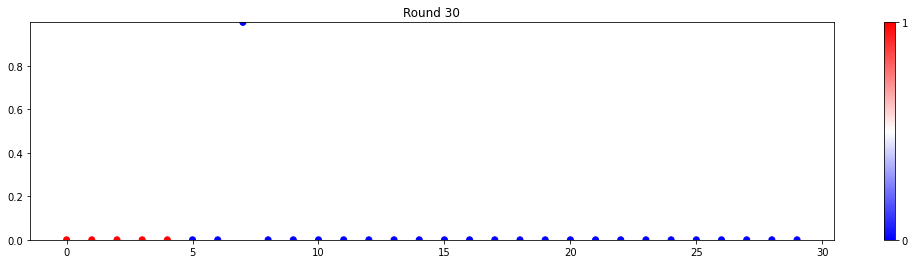

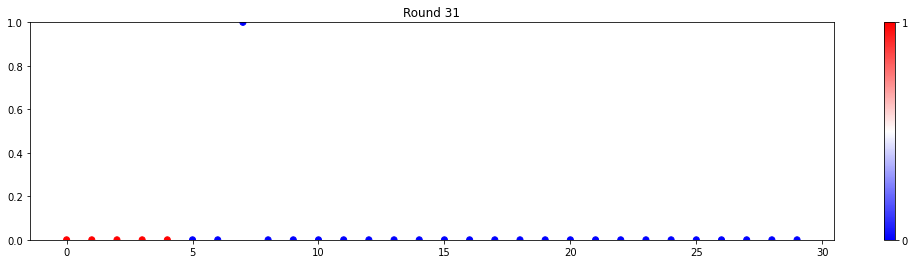

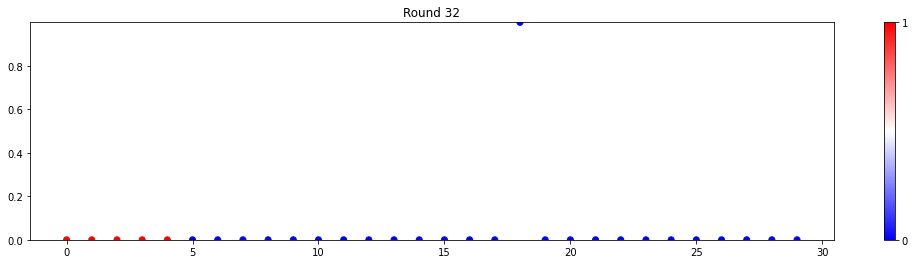

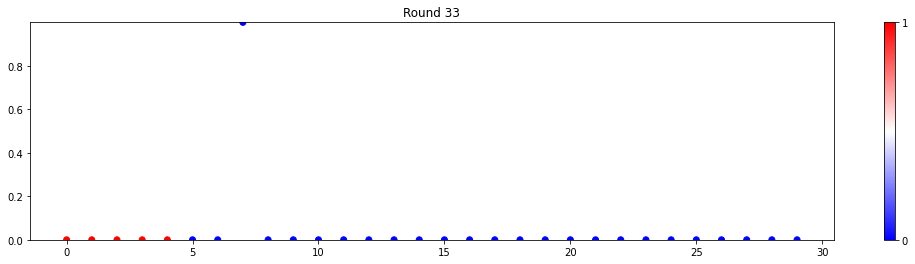

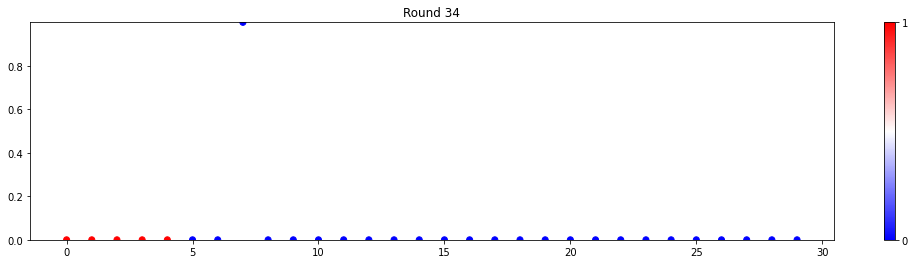

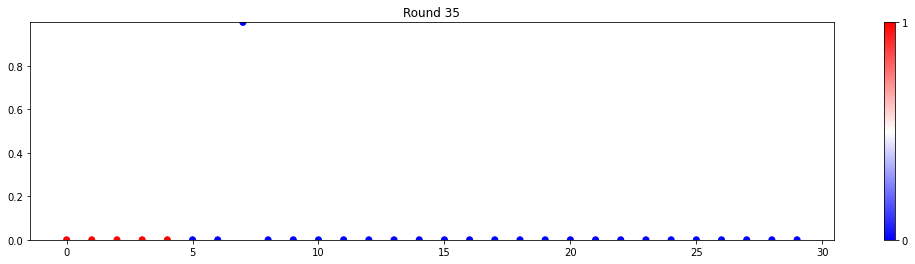

In [2]:
rounds = range(0,36,1)
FILE_PATH="../data_output/20201201_134735_mnist_trust5_normal_outside_W_last_layer_SAN_169"

with open("{}/eavesdroppers".format(FILE_PATH)) as f:
    eavesdoppers = [ii for ii in f.readlines()[0].replace('[','').replace(']','').split(', ')]
    f.close()
    
with open("{}/normal".format(FILE_PATH)) as f:
    normal = [ii for ii in f.readlines()[0].replace('[','').replace(']','').split(', ')]
    f.close()
    
with open('{}/opt_weights'.format(FILE_PATH)) as f:
    lines = f.readlines()
    f.close()

# Red ->Eavesdropper
# Blue -> Normal
color_map = [0 if ww not in eavesdoppers else 1 for ww in (eavesdoppers + normal)]

for line_id, ll in enumerate(lines):
    if line_id in rounds:
        xx = ll.replace("[", "").replace("]\n", "").replace("   ", ' ').replace('  ', " ").strip().split(" ")
        data = {i: float(xx[i].strip()) for i in range(len(xx))}
        plot_weights(list(data.keys()), list(data.values()), line_id, 0.12, color_map)